# Chess King Rook
Predict outcome of chess with 2 kings and 1 rook
Attribute details :
---------------------------------------------------------------------------------
Name | Type | Description
-----------------------|--------------|------------------------------------------
white_king_file | string | Column location on the chess board of the white king 
white_king_rank | string | Row location on the chess board of the white king
white_rook_file | string |	Column location on the chess board of the white rook
white_rook_rank |	string | Row location on the chess board of the white rook
black_king_file |	string | Column location on the chess board of the black king
black_king_rank |	string | Row location on the chess board of the black king
result |	string | Predictor Class. optimal depth-of-win for White in 0 to 16 moves, otherwise drawn Values: {draw, zero, one, two, ..., sixteen}

<br>
<b>Instances:</b> 28056
<b>Attributes:</b> 7
<b>Missing Values:</b> No


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import  plot_tree

In [3]:
df = pd.read_csv('/home/suyash/Downloads/chess_king_rook_dataset.csv')

In [52]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,a,1,b,3,c,2,draw
1,a,1,c,1,c,2,draw
2,a,1,c,1,d,1,draw
3,a,1,c,1,d,2,draw
4,a,1,c,2,c,1,draw


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28056 entries, 0 to 28055
Data columns (total 7 columns):
white_king_file    28056 non-null object
white_king_rank    28056 non-null int64
white_rook_file    28056 non-null object
white_rook_rank    28056 non-null int64
black_king_file    28056 non-null object
black_king_rank    28056 non-null int64
result             28056 non-null object
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [73]:
df.shape

(28056, 7)

In [187]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
white_king_file,28056.0,2.109210,0.936961,0.0,1.0,2.0,3.0,3.0
white_king_rank,28056.0,1.854006,0.926414,1.0,1.0,2.0,2.0,4.0
white_rook_file,28056.0,3.534645,2.280744,0.0,2.0,4.0,6.0,7.0
white_rook_rank,28056.0,4.512404,2.282723,1.0,3.0,5.0,6.0,8.0
black_king_file,28056.0,3.628885,2.055373,0.0,2.0,4.0,5.0,7.0
black_king_rank,28056.0,4.451811,2.248387,1.0,3.0,4.0,6.0,8.0
result,28056.0,11.257022,4.636821,0.0,10.0,13.0,15.0,17.0


### Handling Categorical Features :

In [4]:
pd.factorize(df.white_king_file)

(array([0, 0, 0, ..., 1, 1, 1]), Index(['a', 'b', 'c', 'd'], dtype='object'))

In [5]:
df.white_king_file = pd.factorize(df.white_king_file)[0]

In [6]:
pd.factorize(df.white_rook_file)

(array([0, 1, 1, ..., 5, 5, 5]),
 Index(['b', 'c', 'd', 'e', 'f', 'g', 'h', 'a'], dtype='object'))

In [7]:
df.white_rook_file = pd.factorize(df.white_rook_file)[0]

In [8]:
pd.factorize(df.black_king_file)

(array([0, 0, 1, ..., 2, 3, 4]),
 Index(['c', 'd', 'e', 'f', 'g', 'h', 'a', 'b'], dtype='object'))

In [9]:
df.black_king_file = pd.factorize(df.black_king_file)[0]

In [10]:
pd.factorize(df.result)

(array([ 0,  0,  0, ..., 17, 17, 17]),
 Index(['draw', 'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven',
        'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen',
        'fifteen', 'sixteen'],
       dtype='object'))

In [11]:
df.result = pd.factorize(df.result)[0]

In [12]:
df.head()

,white_king_file,white_king_rank,white_rook_file,white_rook_rank,black_king_file,black_king_rank,result
0,0,1,0,3,0,2,0
1,0,1,1,1,0,2,0
2,0,1,1,1,1,1,0
3,0,1,1,1,1,2,0
4,0,1,1,2,0,1,0


### BoxPlot of all Features :

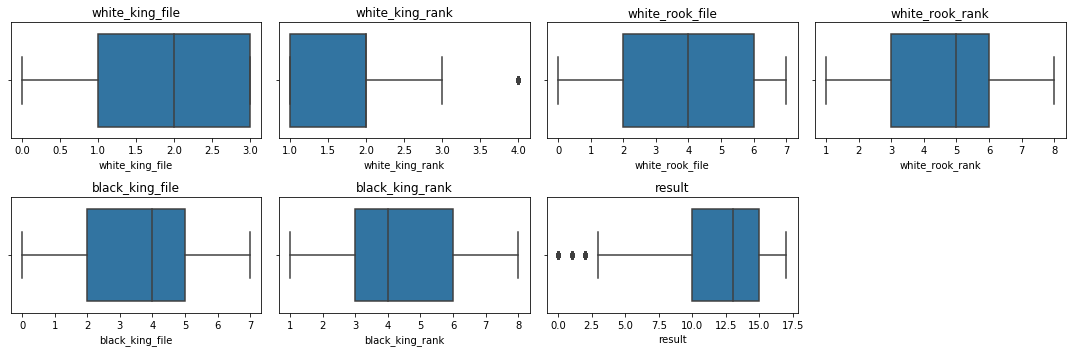

In [33]:
plt.figure(figsize=(15,5))
i=1

for col in df.columns:
    plt.subplot(2,4,i)
    sb.boxplot(df[col])
    plt.title(col)
    plt.tight_layout()
    i+=1

### Heatmap :

(7.0, 0.0)

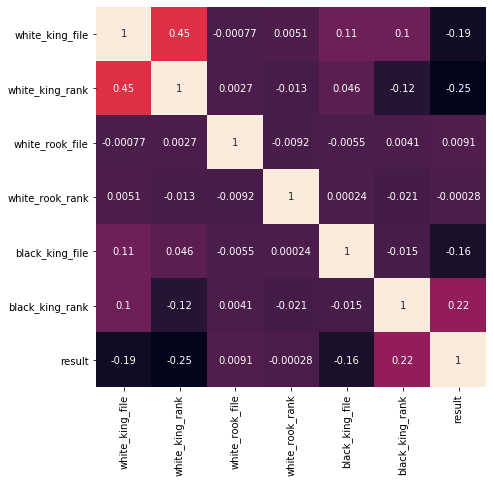

In [175]:
plt.figure(figsize=(7,7))
ax =sb.heatmap(df.corr() , annot=True, cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### Split dependent and independent features :

In [16]:
X = df.drop('result' , axis=1)
Y = df['result']

## Gini Index :

In [18]:
error_gini = pd.DataFrame(columns=['Train_error','Test_error'])

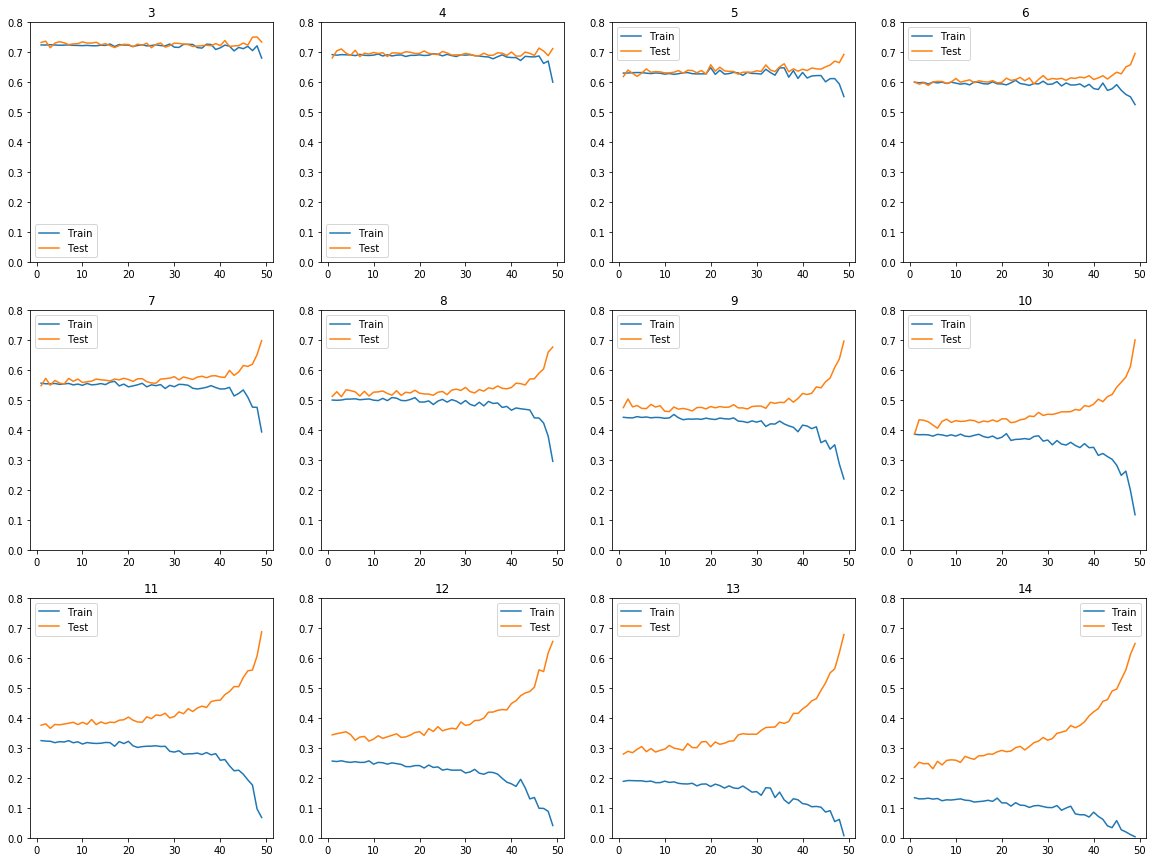

In [19]:
# individual subplot shows the error in trainSet and testSet on different max_depth values of the Decision tree

plt.figure(figsize=(20,15) )
k=1
for depth in range(3,15) :  # iteration to set different values of max_depth of decision tree
    size = 0.02   # intial testsize
    for i in range(1,50) : # iteration to set different testsize
        # splitting trainSet and testSet on different testsize
        xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = size)
        
        clf = DecisionTreeClassifier(criterion='gini',max_depth= depth) # Classifier on different max_depth
        clf.fit(xtrain,ytrain)  #training
        
        size+=0.02     # incrementing the size by 2%
        # record all the errors in dataframe
        error_gini.loc[i] = [ 1- clf.score(xtrain,ytrain) , 1- clf.score(xtest,ytest)]
    
    # Visualising the results
    plt.subplot(3,4,k)
    plt.plot(error_gini.Train_error)   # train error
    plt.plot(error_gini.Test_error)    # test error
    plt.title(depth)   # setting title as the value of max_depth
    plt.ylim(0,0.8)
    plt.legend(['Train','Test'])
    k+=1

In [21]:
error_gini.mean()

Train_error    0.098414
Test_error     0.340853
dtype: float64

## Entropy :

In [14]:
error_entropy = pd.DataFrame(columns=['Train_error','Test_error'])

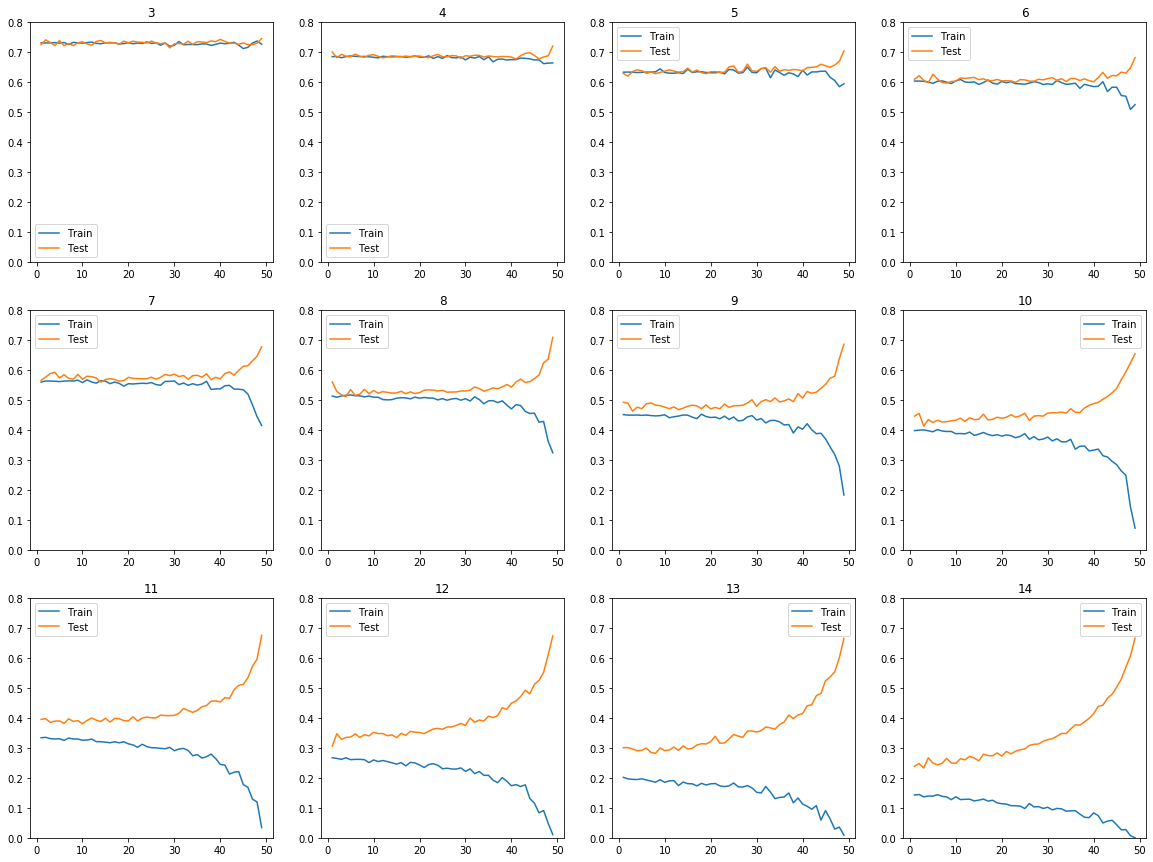

In [17]:
# individual subplot shows the error in trainSet and testSet on different max_depth values of the Decision tree

plt.figure(figsize=(20,15) )
k=1
for depth in range(3,15) :  # iteration to set different values of max_depth of decision tree
    size = 0.02   # intial testsize
    for i in range(1,50) : # iteration to set different testsize
        # splitting trainSet and testSet on different testsize
        xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size = size)
        
        clf = DecisionTreeClassifier(criterion='entropy',max_depth= depth,) #Classifier on different max_depth
        clf.fit(xtrain,ytrain)  #training
        
        size+=0.02     #incrementing the size by 2%
        # record all the errors in dataframe
        error_entropy.loc[i] = [ 1- clf.score(xtrain,ytrain) , 1- clf.score(xtest,ytest)]
    
    # Visualising the results
    plt.subplot(3,4,k)
    plt.plot(error_entropy.Train_error)   # train error
    plt.plot(error_entropy.Test_error)    # test error
    plt.title(depth)   # setting title as the value of max_depth
    plt.ylim(0,0.8)
    plt.legend(['Train','Test'])
    k+=1

In [25]:
error_entropy.mean()

Train_error    0.099461
Test_error     0.338760
dtype: float64

# THANK YOU